In [219]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

# Testing rolling modifier effect on attacks with advantage, using Scoundrel as a test

Advantage negates the chance of missing with an attack, since when you compare two cards, miss can never be the better card.

However, with Gloomhaven's rules, advantage with rolling modifiers applies thusly:

* If one card is rolling, add its effect to the other card drawn

* If both are rolling, continue drawing until a non-rolling is drawn and combine

Thus it is possible to miss with rolling, so how much average damage do you gain for the possibility of MISSING completely?

The default deck is: x0, x2, +0, +0, +0, +0, +0, +0, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1, +2, -2

The no-rolling deck adds the following perks:
* Remove 2 -1 cards
* Remove 2 -1 cards
* Remove 4 +0 cards
* Replace one -2 card with one +0 card
* Replace one -1 card with one +1 card
* Replace one +0 card with one +2 card
* Replace one +0 card with one +2 card

The rolling deck adds the following perks to the above:
* Add two rolling +1 cards
* Add two rolling +1 cards

Thus:
* Non-rolling: x0, x2, +0, +1, +1, +1, +1, +1, +1, +2, +2, +2
* Rolling: x0, x2, +0, +1, +1, +1, +1, +1, +1, +2, +2, +2, +1 Rolling, +1 Rolling, +1 Rolling, +1 Rolling

In [201]:
def adv_check(mod_1, mod_2):
    if mod_1 == "crit":
        return 0
    if mod_2 == "crit":
        return 1
    if mod_1 == "miss":
        return 1
    if mod_2 == "miss":
        return 0
    
    if int(mod_1) >= int(mod_2):
        return 0
    else:
        return 1

no rolling +1 mods: DescribeResult(nobs=500000, minmax=(3, 6), mean=4.800462, variance=0.6449638764837529, skewness=0.16056308737720468, kurtosis=-1.033199186862069)
Miss %: 0.0
4 Rolling +1 attack mods: DescribeResult(nobs=500000, minmax=(0, 14), mean=4.91494, variance=2.3263534491068976, skewness=-0.9424662933934067, kurtosis=4.015419628446408)
Miss %: 4.7926


<function matplotlib.pyplot.show(*args, **kw)>

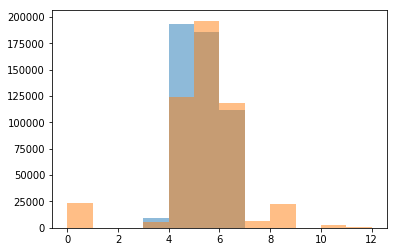

In [228]:
reshuffle = False
base_dmg = 3
attacks = []
scoundrel_deck = ['miss','crit','+2','+1','+1','+1','+1','+1','+1','+0','+2','+2']
random.shuffle(scoundrel_deck)
_ = 0
draws = 500000

while _ < draws:
    att_mod = scoundrel_deck.pop(adv_check(scoundrel_deck[0],scoundrel_deck[1]))
    if(scoundrel_deck.pop(0) == 'miss'):
        reshuffle = True
    if att_mod == "miss":
        reshuffle = True
        damage = 0
    elif att_mod == "crit":
        reshuffle = True
        damage = base_dmg * 2
    else:
        damage = base_dmg + int(att_mod)
    attacks.append(damage)
    _ += 1
    if reshuffle == True:
        scoundrel_deck = ['miss','crit','+2','+1','+1','+1','+1','+1','+1','+0','+2','+2']
        random.shuffle(scoundrel_deck)
        reshuffle = False
print(f'no rolling +1 mods: {stats.describe(attacks)}')
print(f'Miss %: {100*attacks.count(0)/len(attacks)}')
plt.hist(attacks,alpha = 0.5,bins=12, range=(0,12))

#################
#####ROLLING#####
#################

reshuffle = False
base_dmg = 3
attacks = []
rolling = False
scoundrel_deck = ['miss','crit','+2','+1','+1','+1','+1','+1','+1','+0','+2','+2',"+1:R","+1:R","+1:R","+1:R"]
random.shuffle(scoundrel_deck)
num_attacks = 0
_ = 0

while _ < draws:
#     print(scoundrel_deck)
    if rolling == False:
        if scoundrel_deck[0][-1] == "R":
            if scoundrel_deck[1][-1] == "R": #R + R
                damage = base_dmg + int(str.split(scoundrel_deck[0],':')[0]) + int(str.split(scoundrel_deck[1],':')[0])
                rolling = True
                scoundrel_deck.pop(0)
                scoundrel_deck.pop(0)
            else:                            #R + NORMAL
                if scoundrel_deck[1] == 'miss':
                    damage = 0
                    scoundrel_deck.pop(0)
                    scoundrel_deck.pop(0)
                    reshuffle = True
                elif scoundrel_deck[1] == 'crit':
                    damage = (base_dmg + int(str.split(scoundrel_deck[0],':')[0])) * 2
                    scoundrel_deck.pop(0)
                    scoundrel_deck.pop(0)
                    reshuffle = True
                else:
                    damage = base_dmg + int(str.split(scoundrel_deck[0],':')[0]) + int(scoundrel_deck[1])
                    scoundrel_deck.pop(0)
                    scoundrel_deck.pop(0)
        elif scoundrel_deck[1][-1] == "R":    #NORMAL + R
            if scoundrel_deck[0] == 'miss':
                damage = 0
                scoundrel_deck.pop(0)
                scoundrel_deck.pop(0)
                reshuffle = True
            elif scoundrel_deck[0] == 'crit':
                damage = (base_dmg + int(str.split(scoundrel_deck[1],':')[0])) * 2
                scoundrel_deck.pop(0)
                scoundrel_deck.pop(0)
                reshuffle = True
            else:
                damage = base_dmg + int(str.split(scoundrel_deck[1],':')[0]) + int(scoundrel_deck[0])
                scoundrel_deck.pop(0)
                scoundrel_deck.pop(0)
    
        else:                                #NORMAL + NORMAL
            att_mod = scoundrel_deck.pop(adv_check(scoundrel_deck[0],scoundrel_deck[1]))
            if scoundrel_deck.pop(0) == "miss":
                reshuffle = True

            if att_mod == "miss":
                reshuffle = True
                damage = 0
                rolling = False
            elif att_mod == "crit":
                reshuffle = True
                damage = base_dmg * 2
                rolling = False
            else:
                damage = base_dmg + int(att_mod)
    else:  # IF ROLLING IS TRUE (two first cards are both rolling, keep drawing until non-rolling)
        att_mod = scoundrel_deck.pop(0)
        if att_mod == "miss":
            reshuffle = True
            damage = 0
            rolling = False
        elif att_mod == "crit":
            reshuffle = True
            damage = damage * 2
            rolling = False
        else:
            if att_mod[-1] == "R":
                damage = damage + int(str.split(att_mod,':')[0])
            else:
                damage = damage + int(att_mod)
                rolling = False
                
    if rolling == False:
        attacks.append(damage)
        num_attacks += 1
        _ += 1

        if reshuffle == True:
            scoundrel_deck = ['miss','crit','+2','+1','+1','+1','+1','+1','+1','+0','+2','+2',"+1:R","+1:R","+1:R","+1:R"]
            random.shuffle(scoundrel_deck)
            reshuffle = False
print(f'4 Rolling +1 attack mods: {stats.describe(attacks)}')
print(f'Miss %: {100*attacks.count(0)/len(attacks)}')
plt.hist(attacks,alpha = 0.5,bins=12, range=(0,12))
plt.show

# So is it worth it to take those perks?

Over 500000 rounds, the mean damage for the non-rolling deck was 4.8 damage per "roll"/round while the rolling deck is 4.91 damage per "roll"/round. There are even certain rounds where the damage for the rolling deck hit 14 ((3+1+1+1+1)x2). The 4 +1 rolling attack modifiers add about 0.1 damage per round.

## HOWEVER...

The increased damage comes at a cost. The rolling modifiers increase the chance of a complete miss (zero damage) from 0 to almost 5%. In a game where expected damage is king, knowing that you will at least get 3 damage, and most likely get 4 or 5 damage is much more valuable than a chance of getting a very high damage number.